# Airbnb and Zillow Data Challenge
    

### Arvind Ramkumar 
### Email - aramkum4@asu.edu
### Phone - 480-(859)-2393

#### I. Description 
        1. Problem Description and background
        2. Basic Assumptions

#### II. Data Preprocessing 
        1. Working with Airbnb Data 
        2. Working with Zillow Data 

#### III. Data Analysis
        1. Number of Airbnb Properties in NYC 
        2. Number of Reviews Analysis 
        3. Cost Analysis 
        4. Revenue Analysis 
        5. Occupancy Rate Analysis 
        6. Review on Locations Analysis 
        7. Return of Investment (ROI) Analysis 
        8. One Percent Rule
        9. Cumulating all Analysis
 
#### IV. Conclusion and Recommendations 
#### V. Further Suggestions to Model Improvisation 

# I. Description 

Analysis to identify the zipcodes in NYC that are workthful in investing for rental properties with the aid of Airbnb and Zillow Data 

## I. 1 - Problem Description  and Background

The investors are planning to buy properties in NYC and plan for short term rentals. They have already concluded that two bedroom flats are more profitable and we need to make analysis to suggest them on zipcodes that coude be more profitable and less risk 

## I. 2 - Assumptions 

Given Assumptions

1. The investor will pay for the property in cash 
2. The time value of money discount rate is 0% 
3. All properties and all square feet within each locale can be assumed to be homogeneous 

Assumptions Taken

1. The occupancy rate is taken from availability_360
2. One night price is considered for analysis, considering that the monthly rate is given by (30* one night price) discounted at a constant rate 
3. Since, 2 bedrooms flats are known to be more profitable we consider only 2 bedroom flats 
4. The investor could acquire the property at the latest available cost, and here the acquiring cost is assumed to be the price at 2016 July "2016-07"
5. Reviews that have missing data are given zero 

# Data Quality

# II. Data Preprocessing 

Quality Check - Because Bad Data Is Worse Than No Data At All

So, we look at the data, and consider the data that are necessary and bringing it to necessary format. 

#### Import Packages 

In [214]:
import pandas as pd 
import numpy as np 

import matplotlib.pyplot as plt
import seaborn as sns

#### Import Data Set 

In [215]:
airbnb = pd.read_csv("listings.csv")
zillow = pd.read_csv("Zip_Zhvi_2bedroom.csv")

/Users/arvindramkumar/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (43,88) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


## II. 1 - Working With Airbnb Data 

In [216]:
airbnb.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,7949480,https://www.airbnb.com/rooms/7949480,2.017050e+13,5/3/2017,City Island Sanctuary relaxing BR & Bath w Par...,Come relax on City Island in our quiet guest r...,"On parle français et anglais, (lire Français c...",Come relax on City Island in our quiet guest r...,none,City Island is a unique sanctuary in New York ...,...,10.0,f,NaN,NaN,f,moderate,t,t,1,1.59
1,16042478,https://www.airbnb.com/rooms/16042478,2.017050e+13,5/4/2017,WATERFRONT STUDIO APARTMENT,My place is close to Sea Shore. You’ll love my...,(URL HIDDEN),My place is close to Sea Shore. You’ll love my...,none,(URL HIDDEN),...,NaN,f,NaN,NaN,t,flexible,f,f,1,NaN
2,1886820,https://www.airbnb.com/rooms/1886820,2.017050e+13,5/4/2017,Quaint City Island Community.,Quiet island boating town on Long Island Soun...,"Master bed with queen bed, full bath and offi...",Quiet island boating town on Long Island Soun...,none,Small New England type town in the middle of ...,...,NaN,f,NaN,NaN,f,strict,f,f,1,NaN
3,6627449,https://www.airbnb.com/rooms/6627449,2.017050e+13,5/5/2017,Large 1 BDRM in Great location,This ground floor apartment is light and airy ...,"We are close to fishing, boating, biking, hors...",This ground floor apartment is light and airy ...,none,City Island is a unique and a hidden gem of Ne...,...,10.0,f,NaN,NaN,f,strict,f,f,1,0.54
4,5557381,https://www.airbnb.com/rooms/5557381,2.017050e+13,5/4/2017,Quaint City Island Home,"Located in an old sea-shanty town, our home ha...",You won't find a place so close to the city (N...,"Located in an old sea-shanty town, our home ha...",none,"City Island is unique in two ways. First, you ...",...,10.0,f,NaN,NaN,t,moderate,f,f,1,3.63


In [217]:
airbnb.shape

(40753, 95)

In [218]:
airbnb.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'experiences_offered', 'neighborhood_overview',
       'notes', 'transit', 'access', 'interaction', 'house_rules',
       'thumbnail_url', 'medium_url', 'picture_url', 'xl_picture_url',
       'host_id', 'host_url', 'host_name', 'host_since', 'host_location',
       'host_about', 'host_response_time', 'host_response_rate',
       'host_acceptance_rate', 'host_is_superhost', 'host_thumbnail_url',
       'host_picture_url', 'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'street',
       'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'country', 'latitude', 'longitude',
       'is_location_exact', 'property_type', 'room_type', 'accommodates',
       'bathrooms',

If we could look at the data of airbnb, it is really easy to categorize the parameters into a few genres, and they are 

    1. Data about the host 
    2. Data about the location 
    3. Data about the property 
    4. Data about the price 
    5. Data about the Reviews 
    6. Miscallenous Data 
    
    
Here, our motive is to determine which of these parameters will affect the cost in the zipcode. There might be numerous factor that could affect, but we need to consider the factors that will actually affect the result that we need. 

For example, some factors about the host might be affecting the price to a greater extent, but in our case, the company is going to buy a property and they themselves are going to rent it. So, even if the host acts as a factor, there is no point in analyzing that factor. 



#### Null Values in Airbnb Data

In [219]:
null_columns=airbnb.columns[airbnb.isnull().any()]
airbnb[null_columns].isnull().sum()

name                              35
summary                         1615
space                          12872
description                       19
neighborhood_overview          17124
notes                          26146
transit                        15293
access                         17173
interaction                    18276
house_rules                    14834
thumbnail_url                   8616
medium_url                      8616
xl_picture_url                  8616
host_name                        251
host_since                       251
host_location                    416
host_about                     15694
host_response_time             13142
host_response_rate             13142
host_acceptance_rate           40753
host_is_superhost                251
host_thumbnail_url               251
host_picture_url                 251
host_neighbourhood              5194
host_listings_count              251
host_total_listings_count        251
host_has_profile_pic             251
h

In [220]:
airbnb.zipcode.unique()

array(['10464', '10467', '10469', '10462', '11105', '11102', '11370',
       '11106', nan, '11103', '11229', '10472', '10473', '11417', '11416',
       '11421', '11419', '11418', '10457', '10458', '10468', '10460',
       '11357', '10312', '10305', '11692', '11101', '11377', '10003',
       '11103-3233', '11356', '11214', '11228', '11360', '11361', '11364',
       '10280', '10006', '10282', '10004', '10012', '10005', '10033',
       '11209', '11220', '10306', '11691', '11233', '11206', '11221',
       '11205', '11216', '11238', '11211', '11213', '11237', '11226',
       '11207', '10013', '11694', '11001', '11426', '11427', '11426-1175',
       '11204', '11219', '11223', '11236', '11234', '11217', '11201',
       '11232', '11218', '11210', '11435', '11432', '11235', '11224',
       '11225', '11203', '11231', '10451', '10455', '10454', '11212',
       '11249', '11385', '10026', '11411', '11413', '11429', '11412',
       '10002', '10038', '10065', '11374', '11215', '10301', '10314',
     

# Data Munging 

#### Converting Zipcode to Necessary format 

In [221]:
#Remove Null Values
airbnb = airbnb.dropna(subset=['zipcode'])

#Convert all Zip to 5 digits 
airbnb['zipcode'] = airbnb['zipcode'].str[:5]

#Dropping incorrect Zipcode
airbnb = airbnb[airbnb.zipcode != '7310']
airbnb = airbnb[airbnb.zipcode != '5340']
airbnb = airbnb[airbnb.zipcode != '99135']
airbnb = airbnb[airbnb.zipcode != '1m']

#Convert Zipcode datatype to int
airbnb['zipcode'] = pd.to_numeric(airbnb['zipcode'], errors='coerce')
airbnb = airbnb.dropna(subset=['zipcode'])
airbnb['zipcode'] = airbnb['zipcode'].astype(int)

airbnb.zipcode.unique()

array([10464, 10467, 10469, 10462, 11105, 11102, 11370, 11106, 11103,
       11229, 10472, 10473, 11417, 11416, 11421, 11419, 11418, 10457,
       10458, 10468, 10460, 11357, 10312, 10305, 11692, 11101, 11377,
       10003, 11356, 11214, 11228, 11360, 11361, 11364, 10280, 10006,
       10282, 10004, 10012, 10005, 10033, 11209, 11220, 10306, 11691,
       11233, 11206, 11221, 11205, 11216, 11238, 11211, 11213, 11237,
       11226, 11207, 10013, 11694, 11001, 11426, 11427, 11204, 11219,
       11223, 11236, 11234, 11217, 11201, 11232, 11218, 11210, 11435,
       11432, 11235, 11224, 11225, 11203, 11231, 10451, 10455, 10454,
       11212, 11249, 11385, 10026, 11411, 11413, 11429, 11412, 10002,
       10038, 10065, 11374, 11215, 10301, 10314, 10011, 10001, 10010,
       10014, 10018, 10119, 10036, 10029, 10016, 10007, 10456, 10304,
       10475, 10452, 11368, 10465, 10453, 11208, 11362, 11363, 11369,
       11372, 10129, 10035, 10037, 10027, 10128, 10025, 10030, 10028,
       10019, 10459,

#### Convert Price to necessary format  and Considering Only two bedroom apartments

In [222]:
# Converting Price
airbnb['price'] = airbnb['price'].replace( '[\$,)]','', regex=True ).astype(float)

# Considering 2 Bedrooms 
airbnb = airbnb.loc[airbnb['bedrooms'] == 2]

## II. 2 - Working With Zillow Data  

In [223]:
zillow.head()

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2016-09,2016-10,2016-11,2016-12,2017-01,2017-02,2017-03,2017-04,2017-05,2017-06
0,61639,10025,New York,NY,New York,New York,1,NaN,NaN,NaN,...,1374400,1364100,1366300,1354800.0,1327500,1317300,1333700,1352100,1390000,1431000
1,84654,60657,Chicago,IL,Chicago,Cook,2,167700.0,166400.0,166700.0,...,368600,370200,372300,375300.0,378700,381400,381800,382100,383300,385100
2,61637,10023,New York,NY,New York,New York,3,NaN,NaN,NaN,...,1993500,1980700,1960900,1951300.0,1937800,1929800,1955000,2022400,2095000,2142300
3,84616,60614,Chicago,IL,Chicago,Cook,4,195800.0,193500.0,192600.0,...,398900,401200,403200,405700.0,408300,408800,408000,410100,412200,412200
4,93144,79936,El Paso,TX,El Paso,El Paso,5,59100.0,60500.0,60900.0,...,82400,82300,82400,82300.0,82500,83200,83900,84100,83900,83700


In [224]:
zillow.shape

(8946, 262)

#### Considering only zipcode from NY and converting Region Name to necessary format 

In [225]:
# Convert Region name to zipcode  
zillow.rename(columns={'RegionName':'zipcode'}, inplace=True)

# Considering zipcode corresponding to Newyork 
zillow = zillow.loc[zillow['City'] == 'New York']

# Converting zipcode to necessary data type
zillow['zipcode'] = zillow['zipcode'].astype(int)

#### Data Quality Insights  

1. The Main thing that we are considered is the zipcode, price and the cost and there aren't any missing data is price and cost. And relatively a very few missing data in zipcode which could be replaced by latitude and longitude, which suggests that the data has a better quality

2. There is so much data about the host, and we could run so much of NLP or sentimental analysis on the host to determine the influence of host on the occupancy. So, we have got abundance of data 

3. Almost everytime, there is an option for finding out parameters that are not given, but are required for us like the occupancy rate and ROI (Discussed later). So, the quality of the data is excellent and it is upto us to extract the data 

#### Merging both zillow and airbnb data for further analysis

In [226]:
result = pd.merge(airbnb,
                 zillow,
                 on='zipcode')
result.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,2016-09,2016-10,2016-11,2016-12,2017-01,2017-02,2017-03,2017-04,2017-05,2017-06
0,15910991,https://www.airbnb.com/rooms/15910991,2.017050e+13,5/3/2017,House,Рядом с моим жильем Seaside Restaurant. Вам по...,NaN,Рядом с моим жильем Seaside Restaurant. Вам по...,none,NaN,...,373500,378600,382700,385300.0,387900,394500,403800,412000,418900,425100
1,17716523,https://www.airbnb.com/rooms/17716523,2.017050e+13,5/3/2017,20 Minutes from Manhattan Apartment by South B...,Renovated House 2 blocks from the Beach with ...,"My place has a big Eat in Kitchen , Living roo...",Renovated House 2 blocks from the Beach with ...,none,"South Beach is a quiet area in New York, yet c...",...,373500,378600,382700,385300.0,387900,394500,403800,412000,418900,425100
2,16155769,https://www.airbnb.com/rooms/16155769,2.017050e+13,5/5/2017,Manhattan and nature - all close ..,Our house is situated in a quiet location five...,NaN,Our house is situated in a quiet location five...,none,"We are pleased to invite you to our charming, ...",...,373500,378600,382700,385300.0,387900,394500,403800,412000,418900,425100
3,13370393,https://www.airbnb.com/rooms/13370393,2.017050e+13,5/2/2017,Charming.,"My place is close to public transport, parks, ...",NaN,"My place is close to public transport, parks, ...",none,NaN,...,373500,378600,382700,385300.0,387900,394500,403800,412000,418900,425100
4,2611458,https://www.airbnb.com/rooms/2611458,2.017050e+13,5/4/2017,close to Manhattan country setting,Public trans. 30 min to Manhattan. Residential...,The apartment has a kitchen. Laundry room avai...,Public trans. 30 min to Manhattan. Residential...,none,Great residential neighborhood with shopping w...,...,373500,378600,382700,385300.0,387900,394500,403800,412000,418900,425100


# Crafting a Visual Data Narrative

# III. Data Analysis 

## III. 1 - Number of Airbnb Properites in NYC 

This gives us a visual image to think about how many number of properties are located in NYC (2 bedroom) under Airbnb. This will give us a heads up in deciding on where to make the purchase. 

There could be two interpretation 

1. Invest where no one has and venture (High Risk, yet could be more profitable)
2. Invest where every one has already done (Could be sophisticated with less risk and profitable and uncertain of how high the profit) 

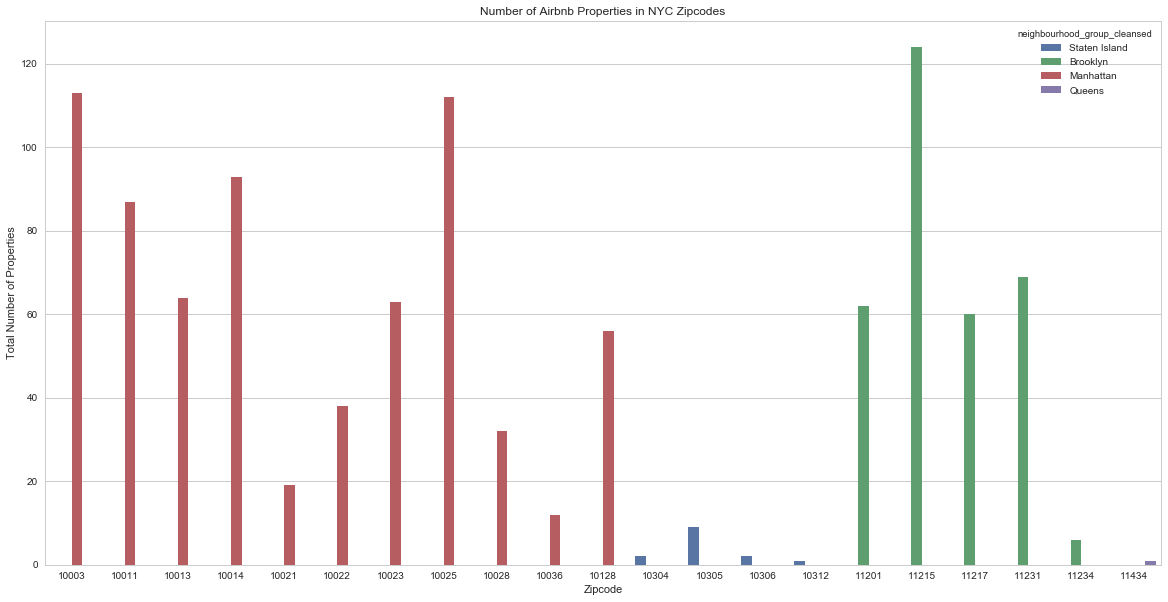

In [227]:
fig, ax= plt.subplots(figsize=(20,10))
propcountfig = sns.countplot(x='zipcode',hue='neighbourhood_group_cleansed', data =result)
sns.set(style="whitegrid")
plt.xlabel("Zipcode")
plt.ylabel("Total Number of Properties")
plt.title("Number of Airbnb Properties in NYC Zipcodes")
plt.show(propcountfig)

#### Occupancy Rate 

Although it is given that we can assume the occupancy rate to be 75%, generalizing it would be not that accurate and it is obvious that not all property will have the same occupancy rate. 

So, with the available data, there are multiple ways that could be used to model the Occupancy Rate, like using the total number of reviews in a zip code to give the occupancy rate. 

But here, I have used the "availability_365" data to define the occupancy rate. It is logical that, if the house is available for the 365 days, then the occupancy is almost zero, and on the contrary, if the house is occupied for all 365 days, then the occupancy rate should be equlat to 100%. So, 

Occupancy Rate = (1 - (Number of days the house is available in next 365 days/ 365)

In [228]:
result['occupancyrate']= (1- (result['availability_365']/365))

## III. 2 - Number of reviews Analysis 

With a number of factors affecting, the number of reviews might as well play an important role in determining whether or not invest in a property. 

There are multiple number of properties in each zipcode and there are number of reviews for each of these properties. So, if we could sum up the reviews given in each of the property for a given zip code, it is possible to obtain the total number of reviews per zipcode. 

Higher the number of reviews is more desirable. 

In [229]:
# Groupby zipcode
review=result.groupby('zipcode')

# Taking the Sum of the total reviews 
reviews=review[['number_of_reviews']].sum()

# Setting Index
reviews=reviews.reset_index()

# Merging with Main file 
result = reviews.merge(result, how='left', on='zipcode')

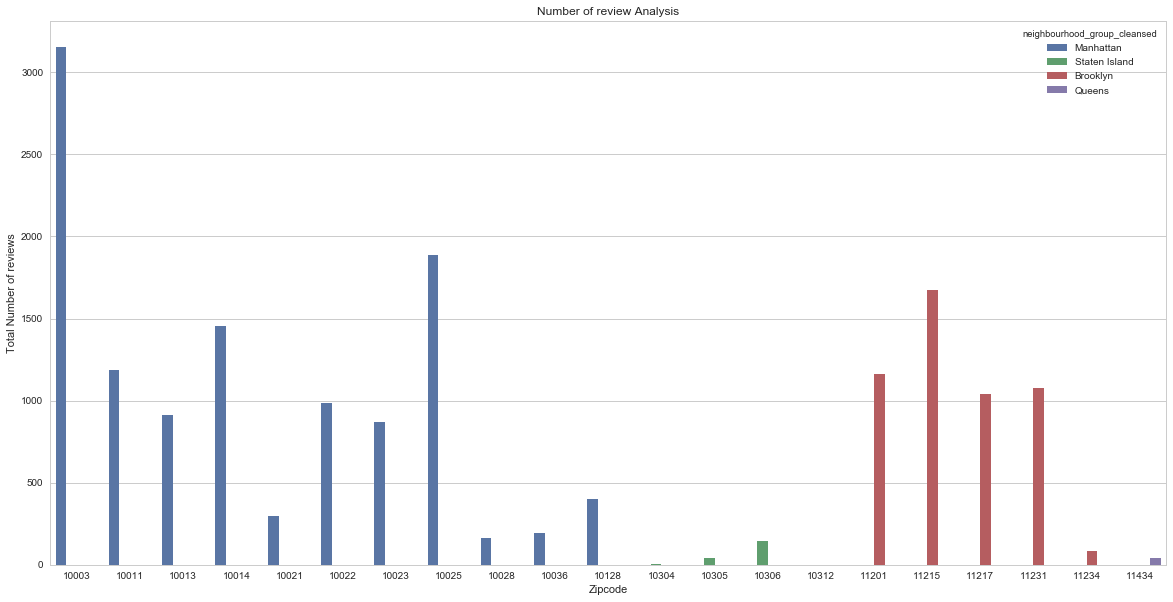

In [230]:
fig, ax= plt.subplots(figsize=(20,10))
noofreviewsfig = sns.barplot(x='zipcode',y='number_of_reviews_x',hue='neighbourhood_group_cleansed', data =result)
sns.set(style="whitegrid")
plt.xlabel("Zipcode")
plt.ylabel("Total Number of reviews")
plt.title("Number of review Analysis")
plt.show(noofreviewsfig)

#### Obtaining Averages 

As mentioned above, there are multiple properties under the same zipcode and it is necessary that we need to aggregate it for the measure for one zipcode. The aggregation is assumed to be mean, because the mean is a better estimate in this case. 

The factors that I think that might work are given below. 

    1. Price for One Night (Higher the better) 
    2. Acquiring Cost (Lower the better)
    3. Reviews of the location given by customer (Higher the better)
    4. Occupancy Rate (Higher the better)
    5. ROI (Higher the better)R

In [231]:
# Groupby zipcode
average=result.groupby('zipcode')

# Taking the mean of Price, Cost, Review Score, ROI and Occupancy Rate 
averagevalues=average[['price','2017-06','review_scores_location','occupancyrate']].mean()

# Setting Index
averagevalues=averagevalues.reset_index()

# Replace zero to all null values
averagevalues = averagevalues.fillna(0)

# Merging with Main file 
result = averagevalues.merge(result, how='left', on='zipcode')

#### Check Whether Occupancy Rate and Number of Reviews are correlated 

There are high chances that the Occupancy rate and the number of reviews might be correlated. Because more the people stay, the more the number of reviews. 

If they are correlated then, having to work on both these parameters together, will create the problem of multicollinearity. So, we check their correlation. 

In [232]:
result['occupancyrate_x'].corr(result['number_of_reviews_x'])

-0.021898460321601854

The Occupancy Rate is just 2% Correlated with the Number of reviews. So, we can have both as a measure. 

## II. 3 - Cost Analysis  

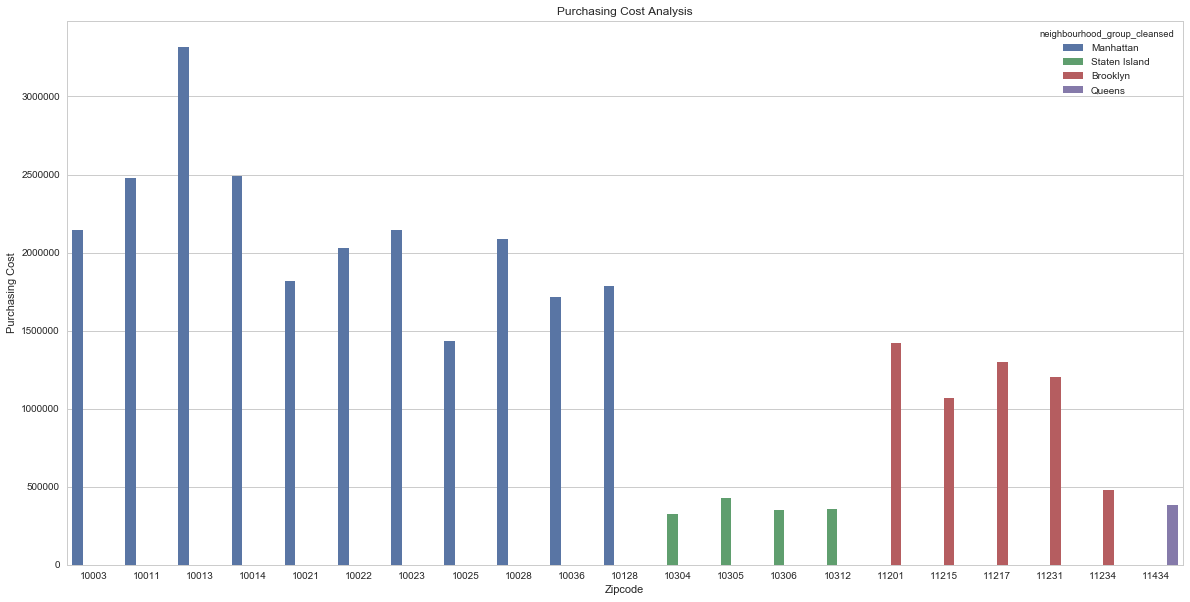

In [233]:
fig, ax= plt.subplots(figsize=(20,10))
costfig = sns.barplot(x='zipcode',y='2017-06_x',hue='neighbourhood_group_cleansed', data =result)
sns.set(style="whitegrid")
plt.xlabel("Zipcode")
plt.ylabel("Purchasing Cost")
plt.title("Purchasing Cost Analysis")
plt.show(costfig)


## II. 4 - Revenue Analysis  

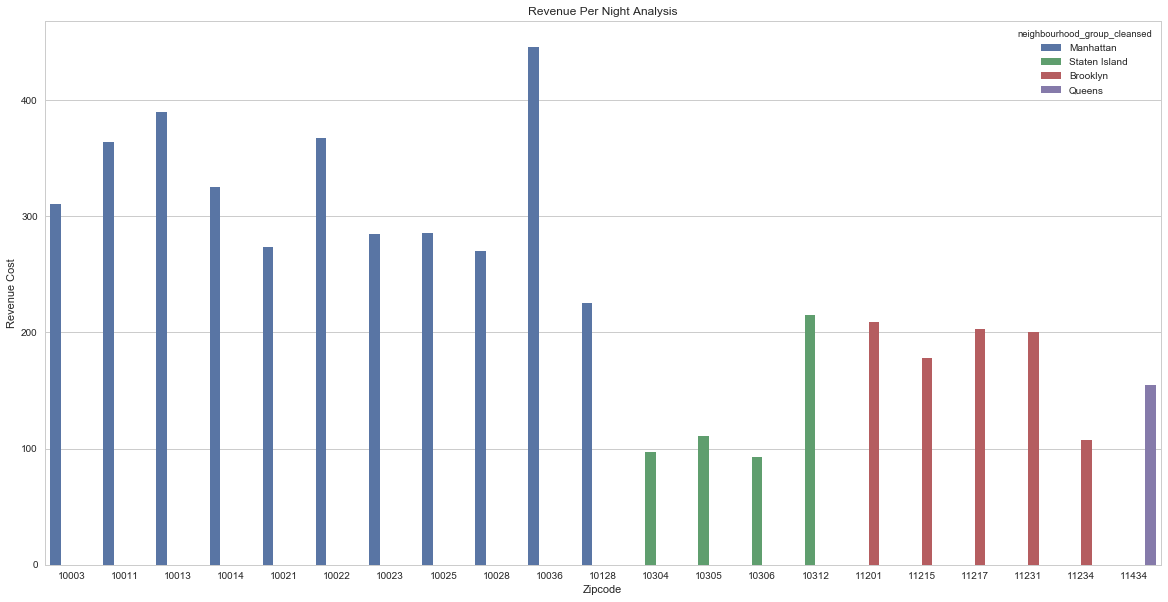

In [234]:
fig, ax= plt.subplots(figsize=(20,10))
revenuefig = sns.barplot(x='zipcode',y='price_x',hue='neighbourhood_group_cleansed', data =result)
sns.set(style="whitegrid")
plt.xlabel("Zipcode")
plt.ylabel("Revenue Cost")
plt.title("Revenue Per Night Analysis")
plt.show(revenuefig)



## II. 5 - Occupancy Rate Analysis  

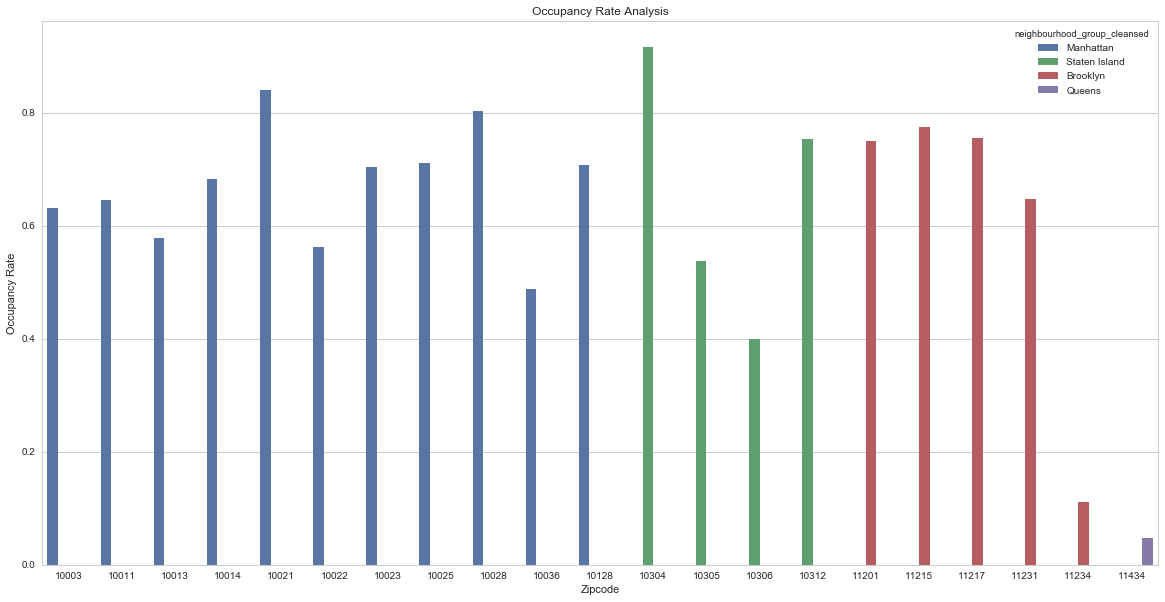

In [235]:
fig, ax= plt.subplots(figsize=(20,10))
occupancyfig = sns.barplot(x='zipcode',y='occupancyrate_x',hue='neighbourhood_group_cleansed', data =result
                          )
sns.set(style="whitegrid")
plt.xlabel("Zipcode")
plt.ylabel("Occupancy Rate")
plt.title("Occupancy Rate Analysis")
plt.show(occupancyfig)

## II. 6 - Review on Location Analysis 

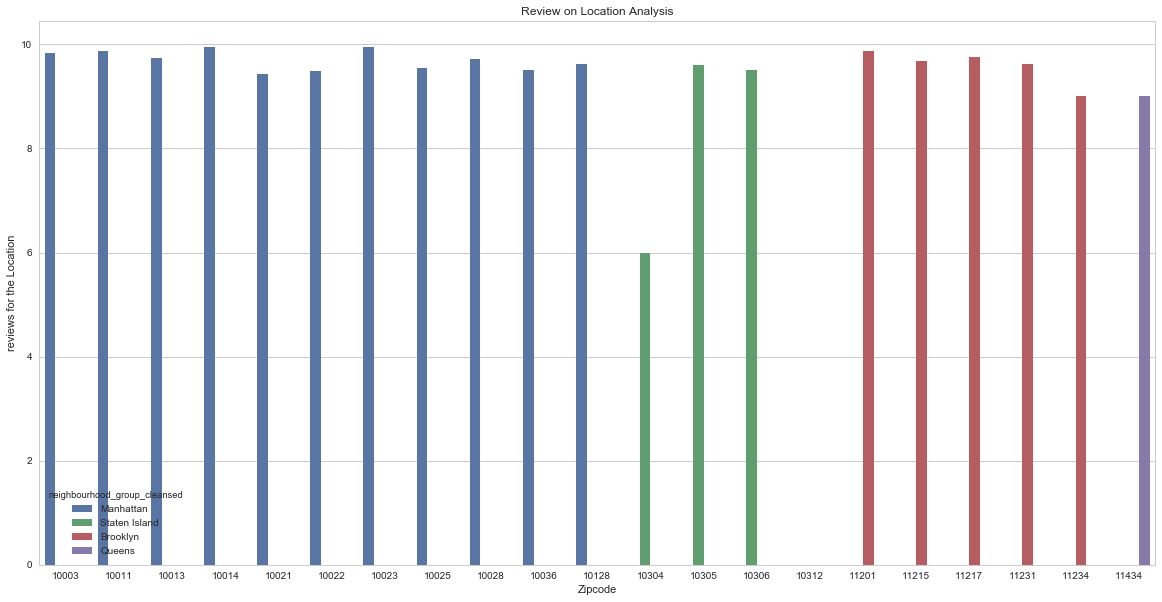

In [236]:
fig, ax= plt.subplots(figsize=(20,10))
locationreviewfig = sns.barplot(x='zipcode',y='review_scores_location_x',hue='neighbourhood_group_cleansed', data =result)
sns.set(style="whitegrid")
plt.xlabel("Zipcode")
plt.ylabel("reviews for the Location")
plt.title("Review on Location Analysis")
plt.show(locationreviewfig)

## II. 7 - ROI Analysis  

Return on investment (ROI) is an accounting term that indicates the percentage of invested money that's recouped after the deduction of associated costs.

Here, since we are acquiring the property with no mortgage or intereste, those cost and all miscellaneous costs are not considered (No sufficient data). Also, we analyse using the one night revenue. 

        ROI = (Price per night * Occupancy rate * 365) / Cost of Acquiring 
        
High ROI is always prefered

In [237]:
result['ROI']= ((result['price_x']*365*result['occupancyrate_x'])/(result['2017-06_x']))

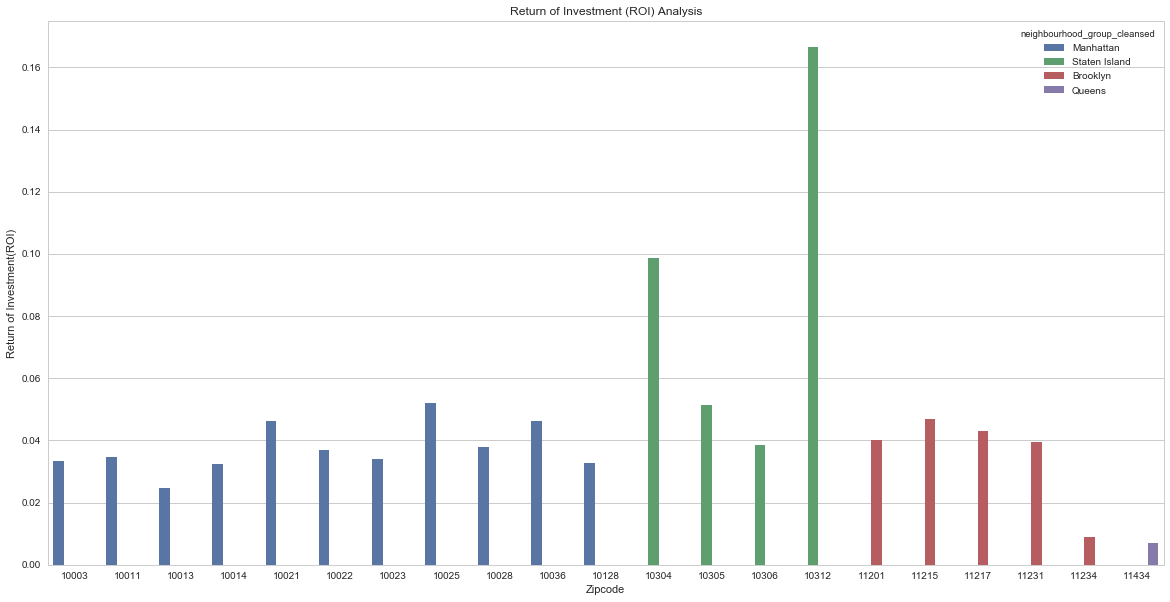

In [238]:
fig, ax= plt.subplots(figsize=(20,10))
roifig = sns.barplot(x='zipcode',y='ROI',hue='neighbourhood_group_cleansed', data =result)
sns.set(style="whitegrid")
plt.xlabel("Zipcode")
plt.ylabel("Return of Investment(ROI)")
plt.title("Return of Investment (ROI) Analysis")
plt.show(roifig)

#### Break Even Period  

It is the reciprocal of ROI. It will let us know the details on when (In Years) we can actually get back our investment and further on it would be pure profit. 

Lesser the Break even period is more preferred. 

But ROI and Break even period are both the same things. So, we use ROI forthe analysis. 

Break even period will help us in realizing in how many years the investor could actually obtain his profit

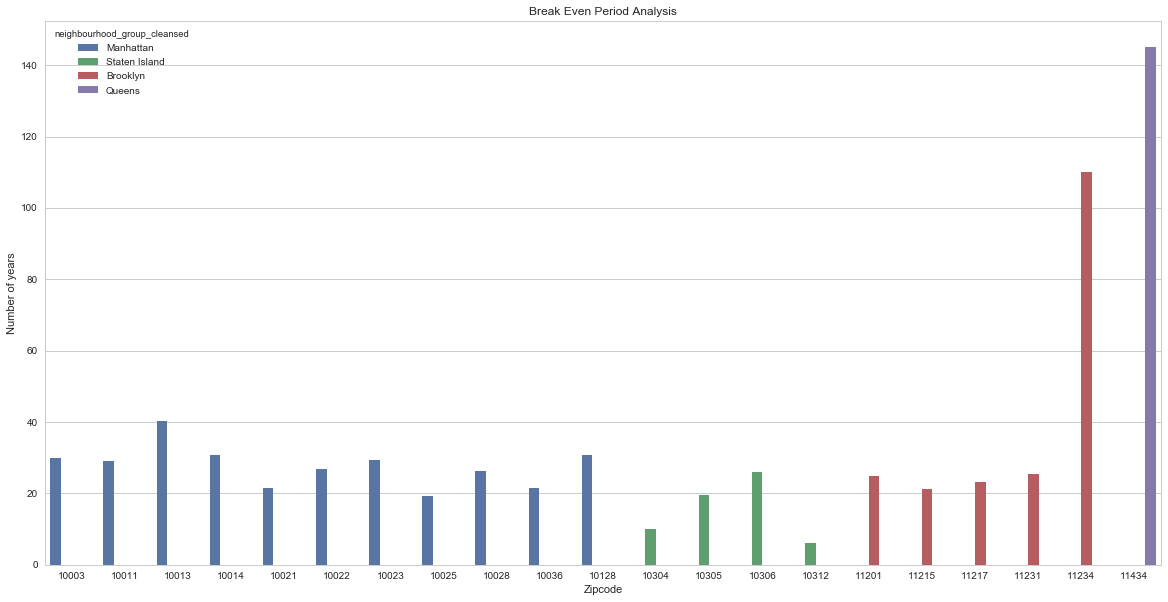

In [239]:
result['breakeven'] = 1 / ((result['price_x']*365*result['occupancyrate_x'])/(result['2017-06_x']))

fig, ax= plt.subplots(figsize=(20,10))
breakevenfig = sns.barplot(x='zipcode',y='breakeven',hue='neighbourhood_group_cleansed', data =result)
sns.set(style="whitegrid")
plt.xlabel("Zipcode")
plt.ylabel("Number of years")
plt.title("Break Even Period Analysis")
plt.show(breakevenfig)

## II. 8 - One Percent Rule 

This is one of the basic calculation to see whether to invest in a property. 

If an investment is not yielding you atleast one percent of your investment per month, then there is no point in buying the property. But the main uderlying principle behind this is that, at most of the times, people will make an investment, by mortgaging and they need to pay the interest. 

This interest will atleast be the one percent of the investment every month. This is the reason why one percent rule is applicable. But here, in our case, we have no mortgaging. Yet, this is still a better measure, which is addressed later. 

In [240]:
# One Month Reveue
result['onemonth']= (result['price_x']*30*result['occupancyrate_x'])

# Percentage Calculation
result['onemonthpercent']= (result['onemonth']/result['2017-06_x'])
result['onemonthpercent_x']= result['onemonthpercent']

# Visualize Zip that satisfies One Percent Rule 
result[result.onemonthpercent>0.01]

,zipcode,price_x,2017-06_x,review_scores_location_x,occupancyrate_x,number_of_reviews_x,id,listing_url,scrape_id,last_scraped,...,2017-03,2017-04,2017-05,2017-06_y,occupancyrate_y,ROI,breakeven,onemonth,onemonthpercent,onemonthpercent_x
702,10312,215.0,355000,0.0,0.753425,0,18004336,https://www.airbnb.com/rooms/18004336,2.017050e+13,5/5/2017,...,345000,348400,351700,355000,0.753425,0.166549,6.004228,4859.589041,0.013689,0.013689


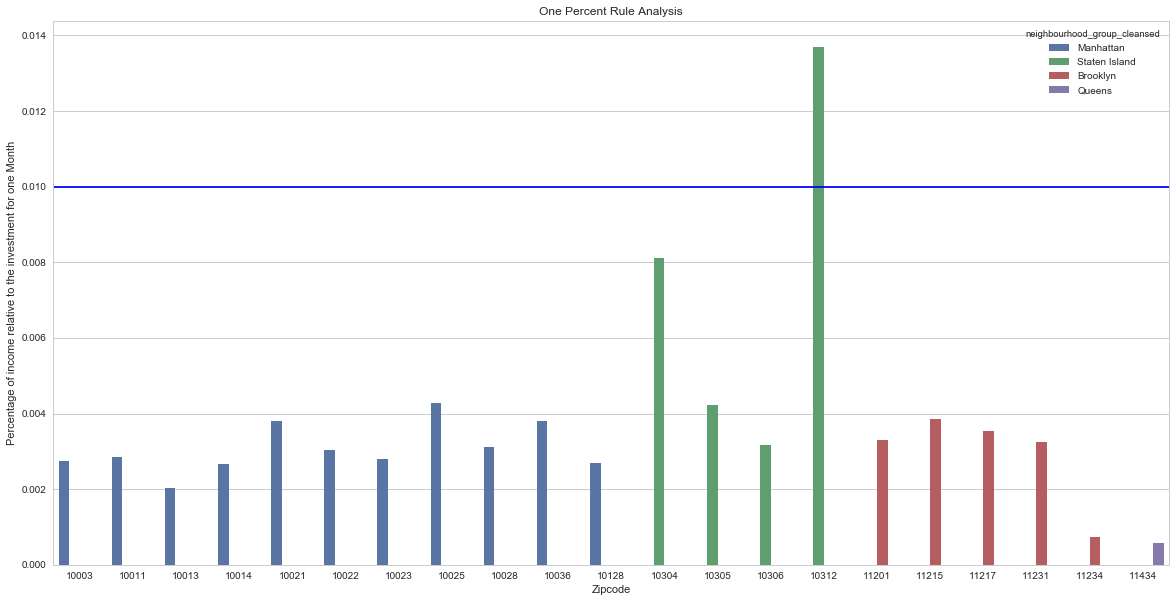

In [241]:
fig, ax= plt.subplots(figsize=(20,10))
ax.axhline(0.01, color="blue")
onepercentfig = sns.barplot(x='zipcode',y='onemonthpercent',hue='neighbourhood_group_cleansed', data =result, ci =1, errcolor='k')
plt.xlabel("Zipcode")
plt.ylabel("Percentage of income relative to the investment for one Month")
plt.title("One Percent Rule Analysis")
plt.show(onepercentfig)

## II. 9 - Cumulating All Analysis

### Giving Rank to Zipcode for all Analysis and Choosing the best location 

With the above all preliminary analysis, we have got various different opinion on which could be better on different terms. 

So, we need a measure to cumulate all the results to look at the most profitable investment. 

Here, I have ranked the zipcodes for every other analysis (Price, Cost, Occupancy, ROI, Location Reviews, Number of reviews), the best value is given the minimal rank (Rank 1), and the worst the highest. 

So, when we aggregate using mean, the most minimal rank will be our winner. 

In [242]:
# Groupby zipcode
rank=result.groupby('zipcode')

# Considering the parameters of Interest 
rank1=rank[['2017-06_x', 'price_x', 'number_of_reviews_x', 'review_scores_location_x', 'occupancyrate_x','ROI']].mean()

# Setting IndexO
rank1=rank1.reset_index()

# Giving Ranks
rank1['Cost Price Rank'] = rank1['2017-06_x'].rank(ascending=True)
rank1['Revenue Price Rank'] = rank1['price_x'].rank(ascending=False)
rank1['Number of Reviews'] = rank1['number_of_reviews_x'].rank(ascending=False)
rank1['Location Review Score'] = rank1['review_scores_location_x'].rank(ascending=False)
rank1['Occupancy Rate Score'] = rank1['occupancyrate_x'].rank(ascending=False)
rank1['ROI Rank'] = rank1['ROI'].rank(ascending=False)

# Total Rank
rank1 ['Total Rank Score'] = (rank1['Cost Price Rank']+ rank1['Revenue Price Rank'] + rank1['Number of Reviews'] + rank1['Location Review Score']+ rank1['ROI Rank'] + rank1['Occupancy Rate Score'])/6

# Merge Rank1 to Main Table 
result = rank1.merge(result, how='left', on='zipcode')

# Visualize Rank1
rank1

,zipcode,2017-06_x,price_x,number_of_reviews_x,review_scores_location_x,occupancyrate_x,ROI,Cost Price Rank,Revenue Price Rank,Number of Reviews,Location Review Score,Occupancy Rate Score,ROI Rank,Total Rank Score
0,10003,2147000,310.814159,3153,9.833333,0.631349,0.033360,18.0,6.0,1.0,5.0,14.0,16.0,10.000000
1,10011,2480400,363.586207,1188,9.880000,0.645347,0.034528,19.0,4.0,5.0,3.0,13.0,14.0,9.666667
2,10013,3316500,389.843750,912,9.738095,0.577954,0.024797,21.0,2.0,10.0,7.0,15.0,19.0,12.333333
3,10014,2491600,325.290323,1452,9.947368,0.682044,0.032501,20.0,5.0,4.0,1.0,11.0,18.0,9.833333
4,10021,1815600,273.842105,300,9.428571,0.839654,0.046225,14.0,9.0,13.0,17.0,2.0,7.0,10.333333
5,10022,2031600,367.289474,983,9.483871,0.561788,0.037071,15.0,3.0,9.0,16.0,16.0,13.0,12.000000
6,10023,2142300,284.698413,871,9.940000,0.703370,0.034118,17.0,8.0,11.0,2.0,10.0,15.0,10.500000
7,10025,1431000,286.000000,1884,9.548780,0.711350,0.051892,11.0,7.0,2.0,13.0,8.0,3.0,7.333333
8,10028,2083900,270.468750,165,9.722222,0.802740,0.038028,16.0,10.0,15.0,8.0,3.0,12.0,10.666667
9,10036,1712900,445.666667,195,9.500000,0.487671,0.046312,12.0,1.0,14.0,14.5,18.0,6.0,10.916667


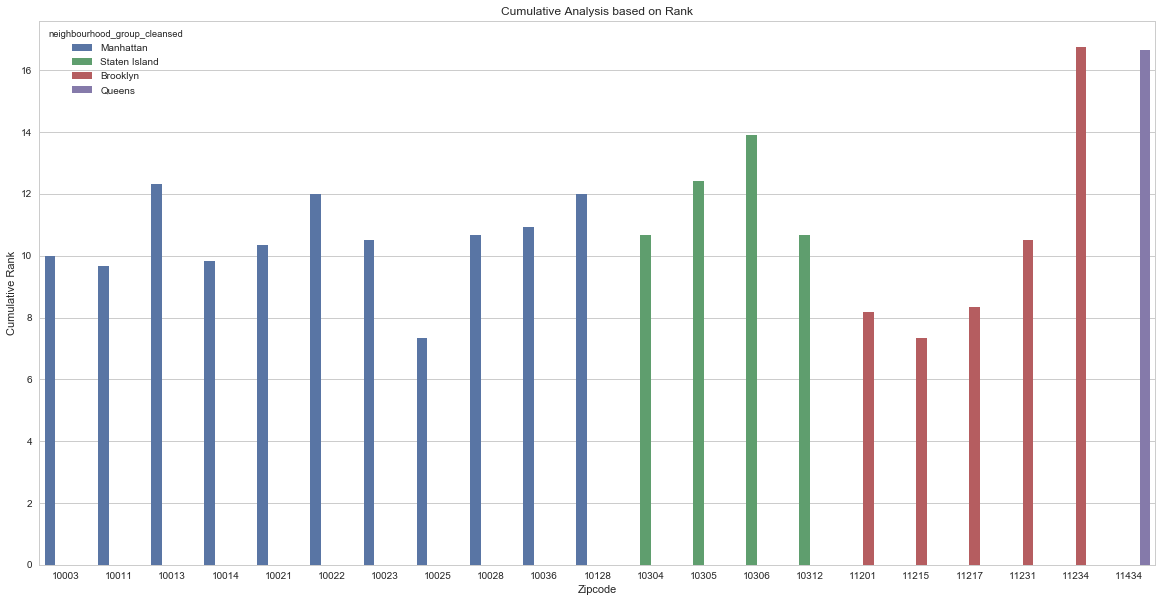

In [243]:
fig, ax= plt.subplots(figsize=(20,10))
rankfig = sns.barplot(x='zipcode',y='Total Rank Score',hue='neighbourhood_group_cleansed', data =result)
sns.set(style="whitegrid")
plt.xlabel("Zipcode")
plt.ylabel("Cumulative Rank")
plt.title("Cumulative Analysis based on Rank")
plt.show(rankfig)

In [244]:
# Groupby zipcode
final=result.groupby('zipcode')

# Considering the parameters of Interest 
best =final[['Total Rank Score']].mean()

# Setting Index
best=best.reset_index()

# Top 5 Zipcodes to Invest based on the rank
best.sort_values('Total Rank Score', ascending = True)

,zipcode,Total Rank Score
7,10025,7.333333
16,11215,7.333333
15,11201,8.166667
17,11217,8.333333
1,10011,9.666667
3,10014,9.833333
0,10003,10.000000
4,10021,10.333333
18,11231,10.500000
6,10023,10.500000


# IV. Conclusion and Recommendations 

According to the Cumulative rank, we can see that the zip codes 10025 and 11215 are more profitable than any other. 

But, if we are okay to take risk, it is possible to consider 10312 as well. This is because, the only place the zipcode 10312 fails is with the lack of reviews and lack of reviews about the locations. 

10312 has lower investment, higher revenue relative to the investment. It has a descent value of occupancy rate as well. But the fact that it will just fail in the review genre, doesnt make it a bad investment. 

10312 is the only zipcode that passess in One Percent rule test as well. So, 10312 is also a zipcode that the investor might want to consider. 

Similarly, 10304 is another zipcode, that fails terribly in the reviews. But has the highest occupancy rate. So, for the cost and revenue, relatively, this is not another option that should be ruled out. The number of properties in 10304 is very very less but has higher demand. So, investing 10304 is one other options, and ruling it out just because it failed in Reviews, doesn't make sense. 

So, (10025, 11215, 10312, 10304) are the possible suggested zipcodes, and it is necessary to discuss with the investor as the final decision is purely dependent on amount of risk the investor is ready to take. 

As said initially, 

There could be two interpretation
    1. Invest where not much people have ventured (High Risk, yet could be more profitable) - 10312, 10304
    2. Invest where every one has already done (Could be sophisticated with less risk and although not high profit, still profitable) - 10025, 11215
    


# V. Further Suggestion for Model Improvization 

# What's Next?

Reliability of the data - In general, we are unaware of the reliability of the data. As it is all manually entered data, they could be more error prone. We need to check for the reliability of the data. This could be done by collecting more data, from various other sources. 

Daily rents of the property - The rental details for the property, are given to be a constant value. But ususally, the prices aren't stable and so they fluctuate. For example over any college breaks, or it could have seasonal dependency. So, the price tends to change. 

Buying Cost of the property - Time series forecasting can be done based on the available data to determine exactly what would be the actual purchasing cost instead of assuming that they are being brought at the cost that was given in the last known period.

Selling Price of the property after the break even period - If we have more rhetorical data, we can do time series foreacasting, to predict what would be the selling price (If they wish to seel it after the break even period) - Higher the selling proce more would be better. And here, the necessity for more rhetorical data is because - the break even period is approximately 15 years , and using 10 years of data to predict the next 15th year wont be accurate and reliable 

Area dependency for the price - We do not have any information about the area of the property (It has got 40186 missing data's). If we are able to get that data, then we can analyze the price based on the area dependencies. Same zipcode with higher area will have higher rent. And of it is available it is possible to categorize the same zipcode based on area and analyze. For example, instead of taking the average of prices of the properties in each zipcode, we can categorize like (0-500 sqft in one category, 500-1000 sqft in another and so on). So apart from knowing where to invest, also we will know whether ti invest in a bigger property 

Occupancy - Here, we have used the occupancy rate based on the availability for the next 365 days. But the occupancy rate might just not be dependent on that. We need to have other factors to estimate the real occupancy rate. We can colllect data from other sources to have more accurate Occupancy Rate 

Host dependency - From the different genres of the data of Airbnb, we have completly neglected the information about the host, because we are not going to deal with these hosts directly. But, the price and occupancy might be highly influential on the categories of data about host. So, we need to use some measure to remove the dependency of the host on price and occuoancy rate

Heat map of occupancy rate - If we are able to visualize the occupancy rate on the map of NYC, we can visualize if there are anything around the locality that is highly influencing the occupancy rate. The place around it could have a great scenic view, or there could be high occupancy in downtown. 

Heat map of number of airbnb properties - Similar to the above mentioned, this will help us to visualize if there are anything specific to the surroundings that is influencing people to have more properties around them. 

Using Latitude and Longitude to determine the missing zipcodes and misssing zipcodes - Although there are only arpound 720 missing and incorrect zipcodes, replacing it with the help of latitude and longitudes might affect the model and it might help in more accurate visualization 

Other possible costs needs to be considered - We are just considering the revenue that we can get and not considering the possible expenses like maintainence or Property tax etc. Without this the visualization is never accurate. So, we can collect data on this and use this real time to make more accurate analysis 

